# Orthogonality in Potapov modes

The modes of a system will not always be orthogonal because some of the signal leaks out of the system. Let's use the Potapov analysis for a specific example to determine when the orthogonality approximation can be made.

The example used here is example 3 in our code, which corresponds to figure 7 in our paper. This example is formed by two inter-linked cavities with two inputs and outputs.

In the notebook "Bi-orthogonality testing" we show how this issue can be avoided using a bi-orthogonal basis.

In [1]:
import Potapov_Code.Roots as Roots 
import Potapov_Code.Potapov as Potapov
import Potapov_Code.Time_Delay_Network as Time_Delay_Network
import Potapov_Code.Time_Sims as Time_Sims
import Potapov_Code.functions as functions
import Potapov_Code.tests as tests

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def contour_plot(Mat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(abs(Mat), interpolation='nearest')
    fig.colorbar(cax)
    plt.show()

In [37]:
def run_example3(r1 = 0.9,r2=0.4, r3 = 0.9):
    Ex = Time_Delay_Network.Example3(r1=r1,r2=r2,r3=r3,max_freq=50.,max_linewidth=35.)
    Ex.run_Potapov(commensurate_roots = True)
    E = Ex.E
    roots = Ex.roots
    M1 = Ex.M1
    delays = Ex.delays
    modes = functions.spatial_modes(roots,M1,E)
    Mat = functions.make_normalized_inner_product_matrix(roots,modes,delays)
    #contour_plot(Mat)
    
    #for root,mode in zip(roots,modes):
    #    print root,mode
    return Mat

In [52]:
M = np.matrix([[1,1],[2,2]])

In [64]:
def off_diagonal_error(M):
    err = 0.
    if M.shape[0] != M.shape[1]:
        print "Not a square matrix!"
        return 0.
    length = M.shape[0]
    for i in range(length):
        for j in range(length):
            if i != j:
                err += abs(M[i,j])**2
    return np.sqrt(err) / (length*(length - 1))

In [65]:
rs = [.01,0.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99,.999]

## Varying r1 and r3 -- the input-output mirrors

In [39]:
Ms = {}
for r in rs:
    Ms[r] = run_example3(r1=r,r3=r)

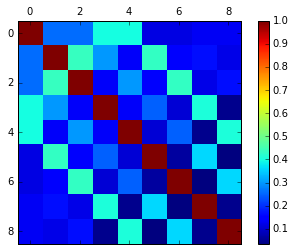

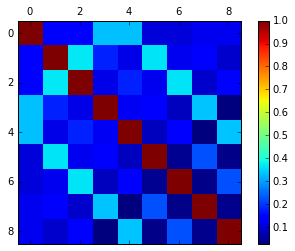

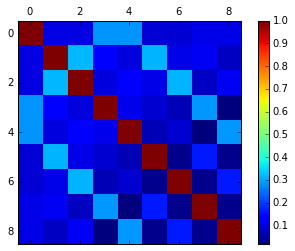

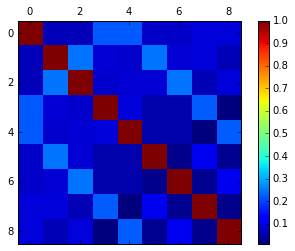

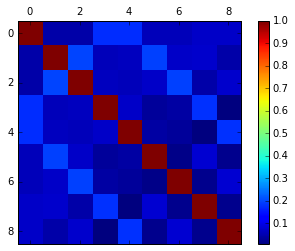

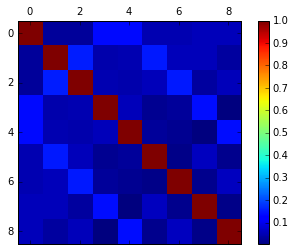

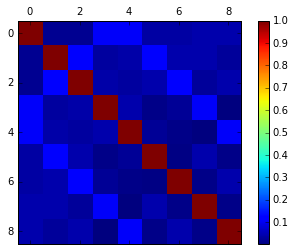

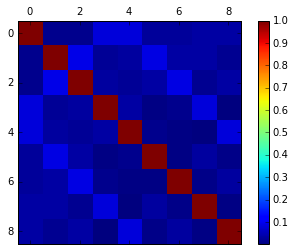

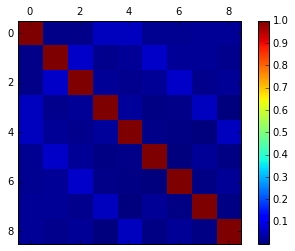

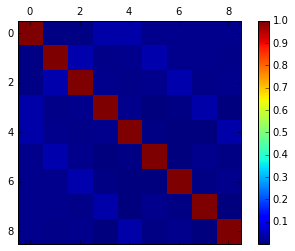

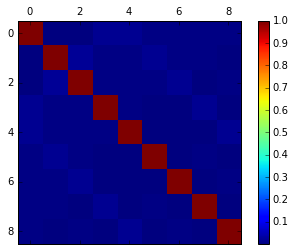

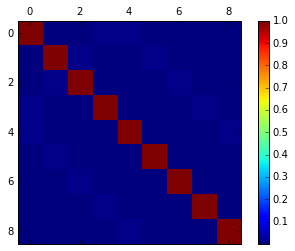

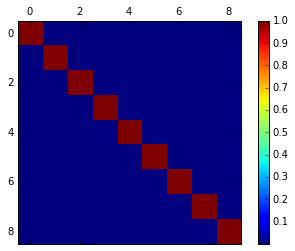

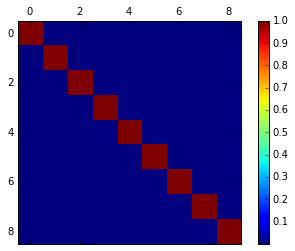

In [40]:
for r in rs:
    contour_plot(Ms[r])

In [67]:
err = {}
for r in rs:
    err[r] =  off_diagonal_error(Ms[r])

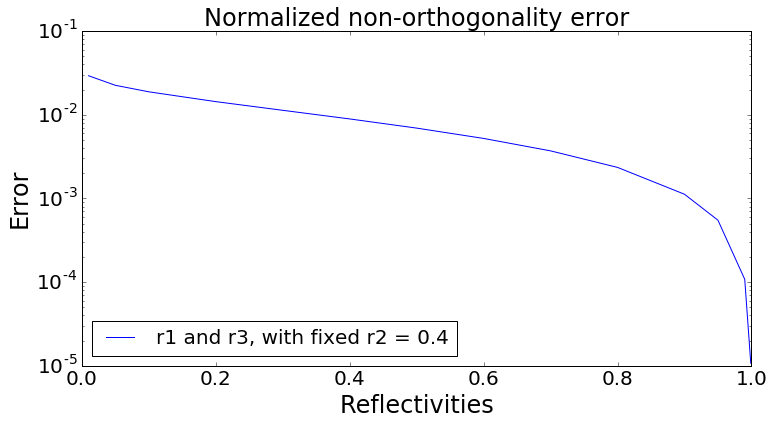

In [68]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err[r] for r in rs],label='r1 and r3, with fixed r2 = 0.4')
plt.yscale('log')
plt.xlabel('Reflectivities',{'fontsize': 24})
plt.title('Normalized non-orthogonality error',{'fontsize': 24})
plt.ylabel('Error',{'fontsize': 24})
plt.yticks( size=20)
plt.xticks( size=20)
plt.legend(loc='lower left',fontsize=20)
plt.savefig('orth_err.pdf')

## Varying r1 with constant r3=1

In [43]:
Ms0 = {}
for r in rs:
    Ms0[r] = run_example3(r1=r,r3=1.)

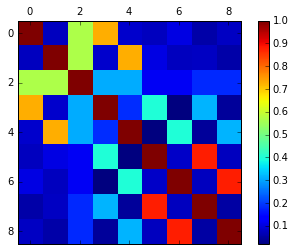

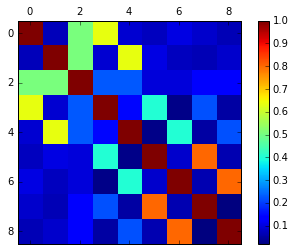

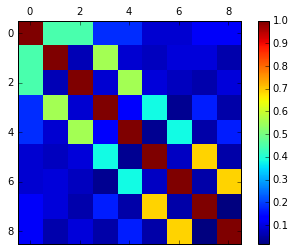

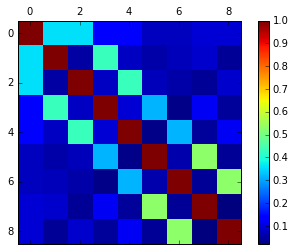

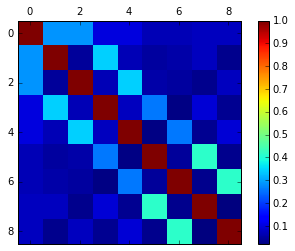

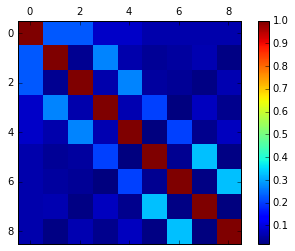

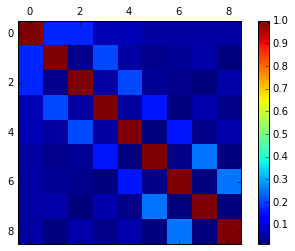

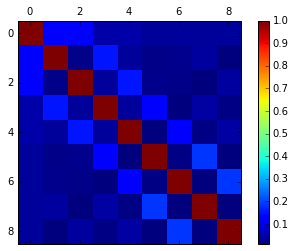

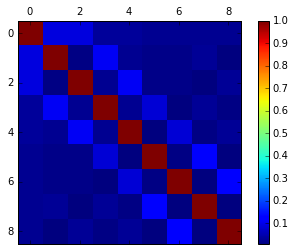

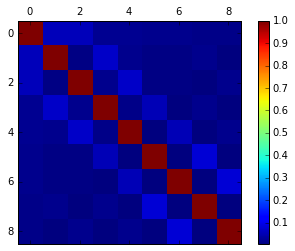

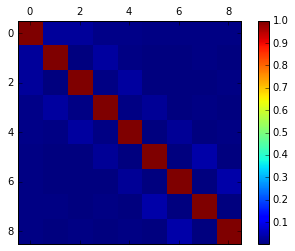

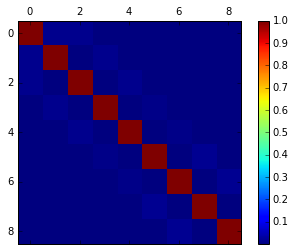

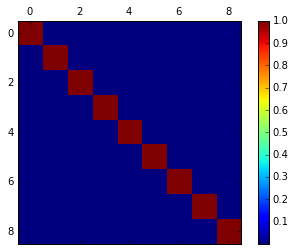

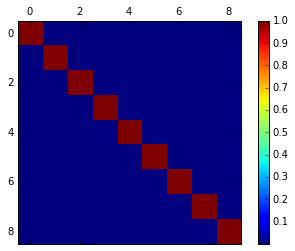

In [44]:
for r in rs:
    contour_plot(Ms0[r])

In [70]:
err0 = {}
for r in rs:
    err0[r] =  off_diagonal_error(Ms0[r])

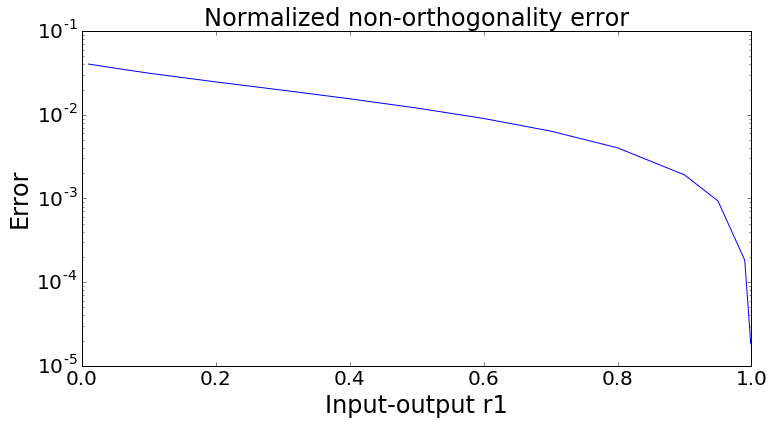

In [71]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err0[r] for r in rs])
plt.yscale('log',size=32)
plt.xlabel('Input-output r1',{'fontsize': 24})
plt.title('Normalized non-orthogonality error',{'fontsize': 24})
plt.ylabel('Error',{'fontsize': 24})
plt.yticks( size=20)
plt.xticks( size=20)
plt.savefig('orth_err.pdf')

## Varying r2-- the internal mirror

In [47]:
Ms2 = {}
for r in rs:
    Ms2[r] = run_example3(r1=.9,r2 = r,r3=.9)

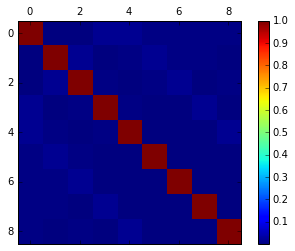

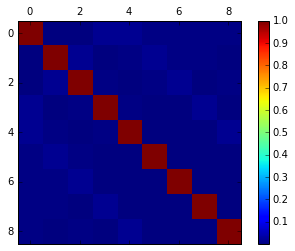

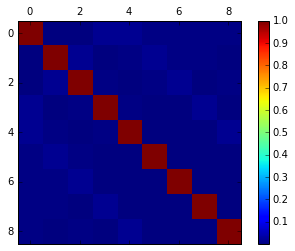

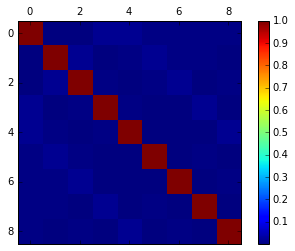

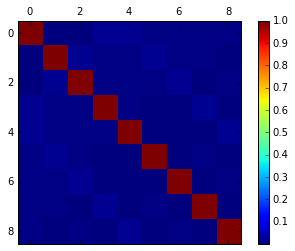

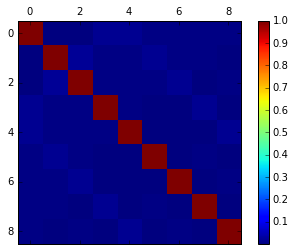

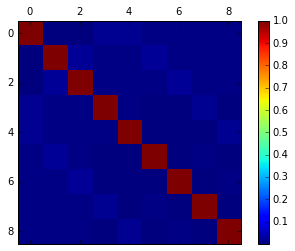

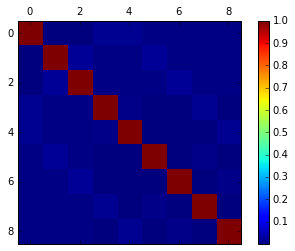

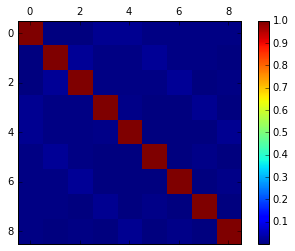

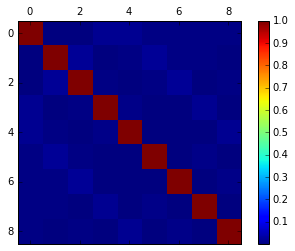

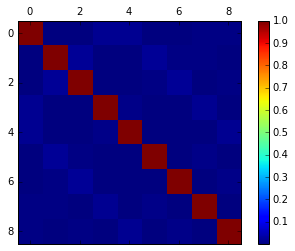

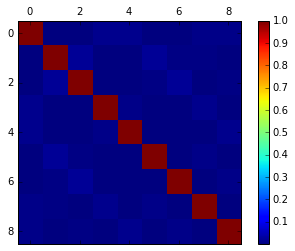

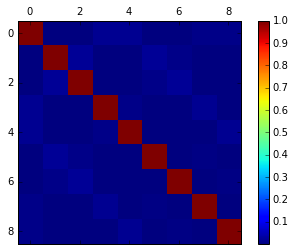

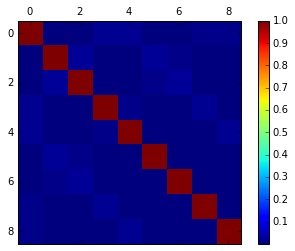

In [48]:
for r in rs:
    contour_plot(Ms2[r])

In [72]:
err2 = {}
for r in rs:
    err2[r] = off_diagonal_error(Ms2[r])

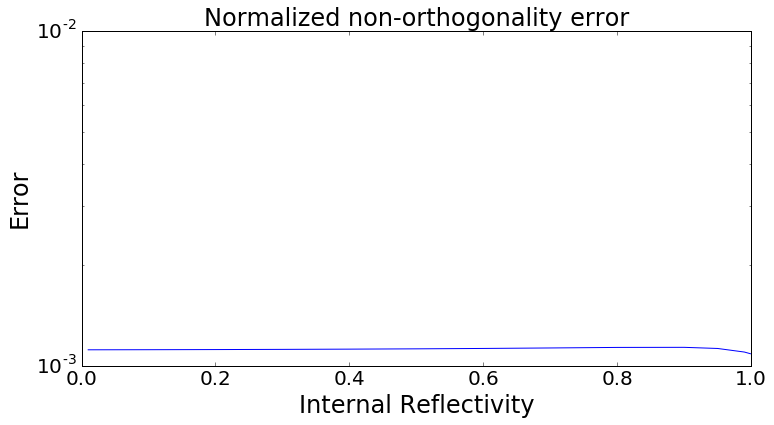

In [73]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err2[r] for r in rs])
plt.yscale('log')
plt.xlabel('Internal Reflectivity',{'fontsize': 24})
plt.title('Normalized non-orthogonality error',{'fontsize': 24})
plt.ylabel('Error',{'fontsize': 24})
plt.yticks( size=20)
plt.xticks( size=20)
plt.savefig('orth_err.pdf')

# Plot all 3 together

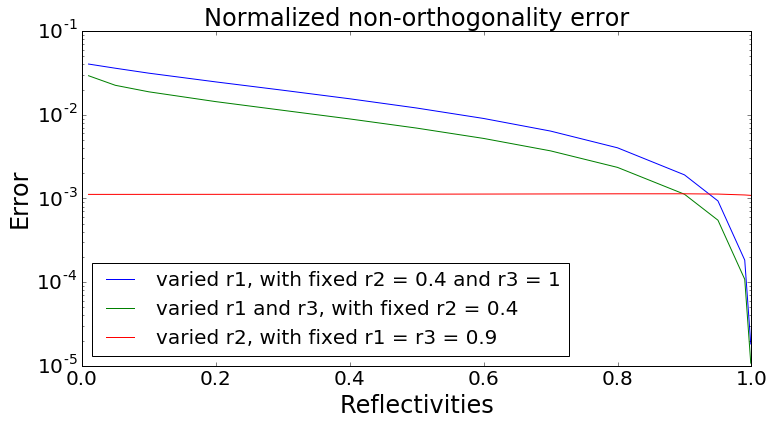

In [74]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err0[r] for r in rs],label='varied r1, with fixed r2 = 0.4 and r3 = 1')
plt.plot(rs,[err[r] for r in rs],label='varied r1 and r3, with fixed r2 = 0.4')
plt.plot(rs,[err2[r] for r in rs],label='varied r2, with fixed r1 = r3 = 0.9')

plt.yscale('log')
plt.xlabel('Reflectivities',{'fontsize': 24})
plt.title('Normalized non-orthogonality error',{'fontsize': 24})
plt.ylabel('Error',{'fontsize': 24})
plt.yticks( size=20)
plt.xticks( size=20)
plt.legend(loc='lower left',fontsize=20)
plt.savefig('orth_err.pdf')